<a href="https://colab.research.google.com/github/ManuelRomero2025/CienciasdeDatos1/blob/main/PCA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://python-graph-gallery.com/47-faceted-scatter-plot-with-seaborn/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [4]:
# Asegúrate de haber montado Google Drive previamente
from google.colab import drive
drive.mount('/content/drive')

# Leer el archivo desde Drive

df = pd.read_csv('/content/drive/MyDrive/CienciasDatos2025/World-happiness-report-2024.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [8]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [10]:
df.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
upperwhisker,0
lowerwhisker,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3


In [15]:
# Perfecto, vamos a aplicar lo que indicas:
# Llenar los valores faltantes de columnas numéricas con la media de cada columna

# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# Rellenar los valores faltantes con la media de cada columna numérica
df_1 = df.copy() # Aquí también se reemplaza 'df_original' con 'df'
df_1[numeric_cols] = df_1[numeric_cols].fillna(df_1[numeric_cols].mean())

# Verificar si quedaron valores faltantes
missing_after = df_1.isnull().sum().sum()

missing_after

np.int64(0)

In [16]:
df_1.describe()


,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.420584,0.329777,0.163171,0.160766,0.072661,0.124898,0.531751
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.079000,0.924500,0.400000,0.531000,0.092500,0.069000,1.317000
50%,5.785000,5.895000,5.674000,1.403000,1.217000,0.549000,0.632000,0.138000,0.122000,1.640000
75%,6.416000,6.507500,6.319000,1.733000,1.377000,0.644000,0.734000,0.191500,0.191000,1.879500
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [17]:
df_1.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
upperwhisker,0
lowerwhisker,0
Log GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0


In [18]:
df_1['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Bahrain',
       'Croatia', 'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica',
       'Peru', 'Dominican Republic', 'Mauritius', 'Moldova', 'Russia',
       'Boli

<ipython-input-23-5db29c347368>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # Quitar leyenda


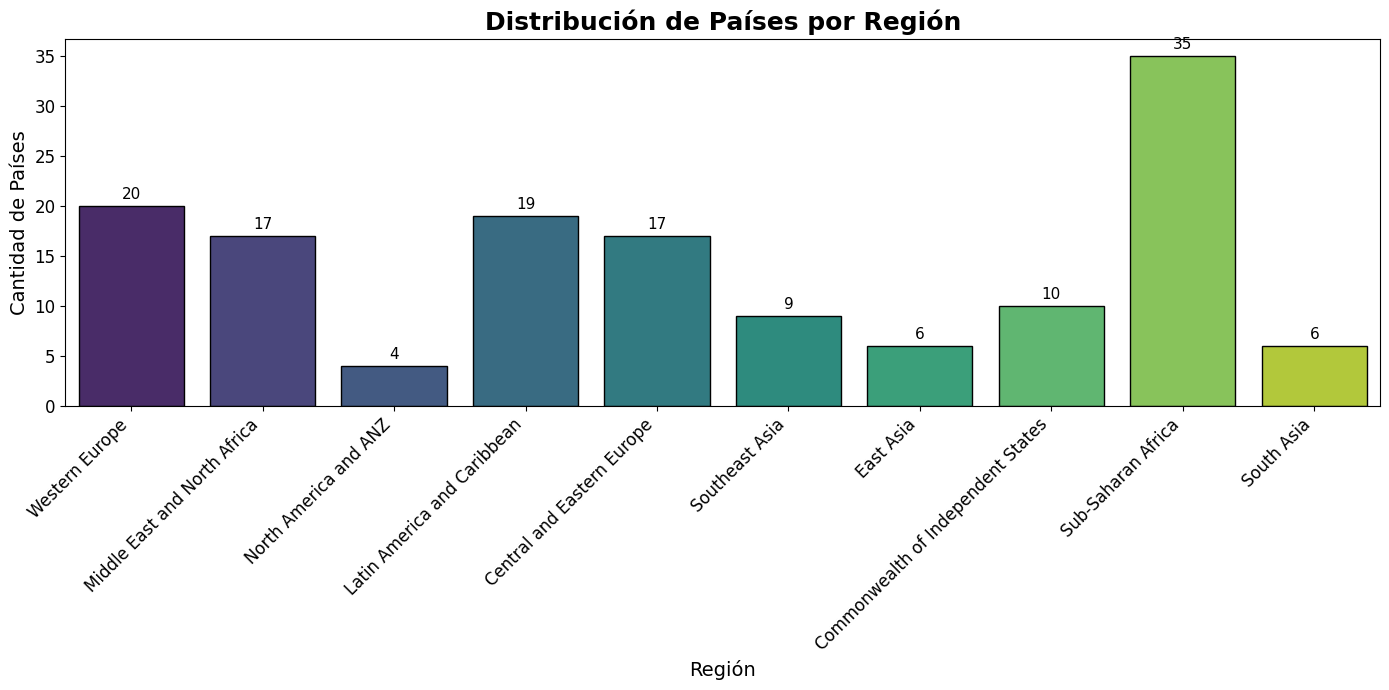

In [23]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(
    data=df_1,
    x='Regional indicator',
    hue='Regional indicator',
    palette='viridis',
    edgecolor='black'
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribución de Países por Región', fontsize=18, fontweight='bold')
plt.xlabel('Región', fontsize=14)
plt.ylabel('Cantidad de Países', fontsize=14)
plt.legend().remove()  # Quitar leyenda

# Agregar etiquetas de conteo arriba de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()



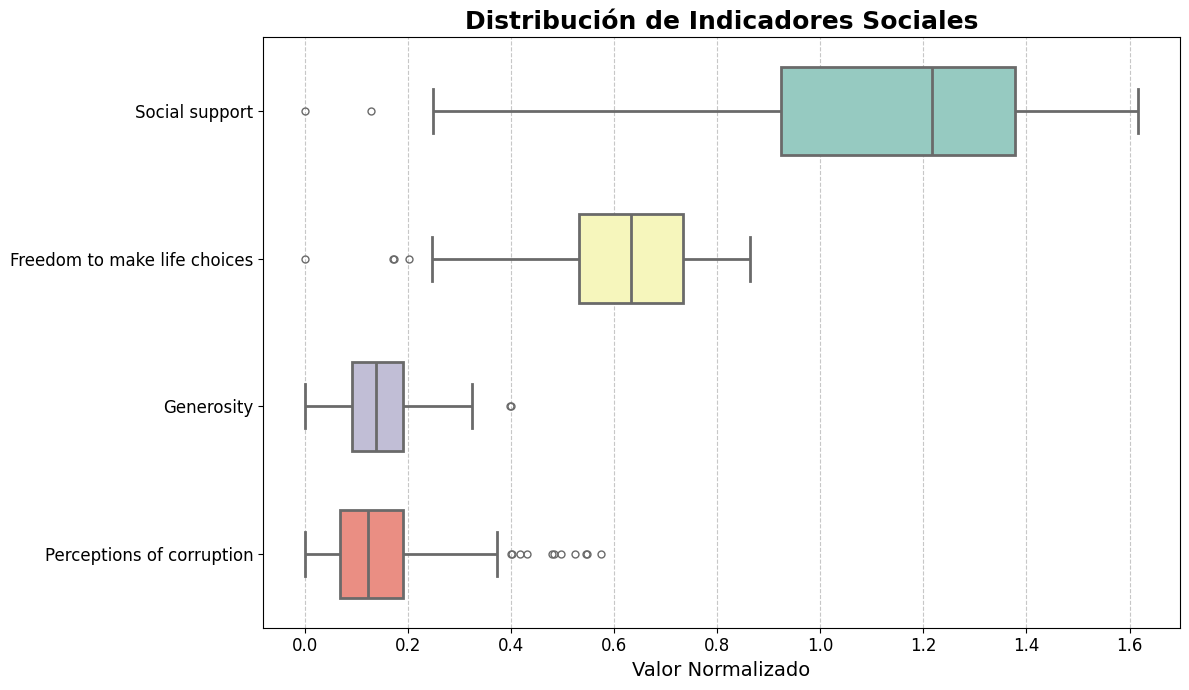

In [24]:
# Definir nuevamente la lista de características
list_features = ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Volver a generar el gráfico mejorado
plt.figure(figsize=(12, 7))
ax = sns.boxplot(
    data=df_1.loc[:, list_features],
    orient='h',
    palette='Set3',
    linewidth=2,
    fliersize=5,  # tamaño de los outliers
    width=0.6     # ancho de las cajas
)

# Mejorar el estilo
plt.title('Distribución de Indicadores Sociales', fontsize=18, fontweight='bold')
plt.xlabel('Valor Normalizado', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Agregar líneas horizontales suaves

# Bordes más visibles para cada caja
for patch in ax.artists:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

plt.tight_layout()
plt.show()



<ipython-input-25-257ccf07dd07>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


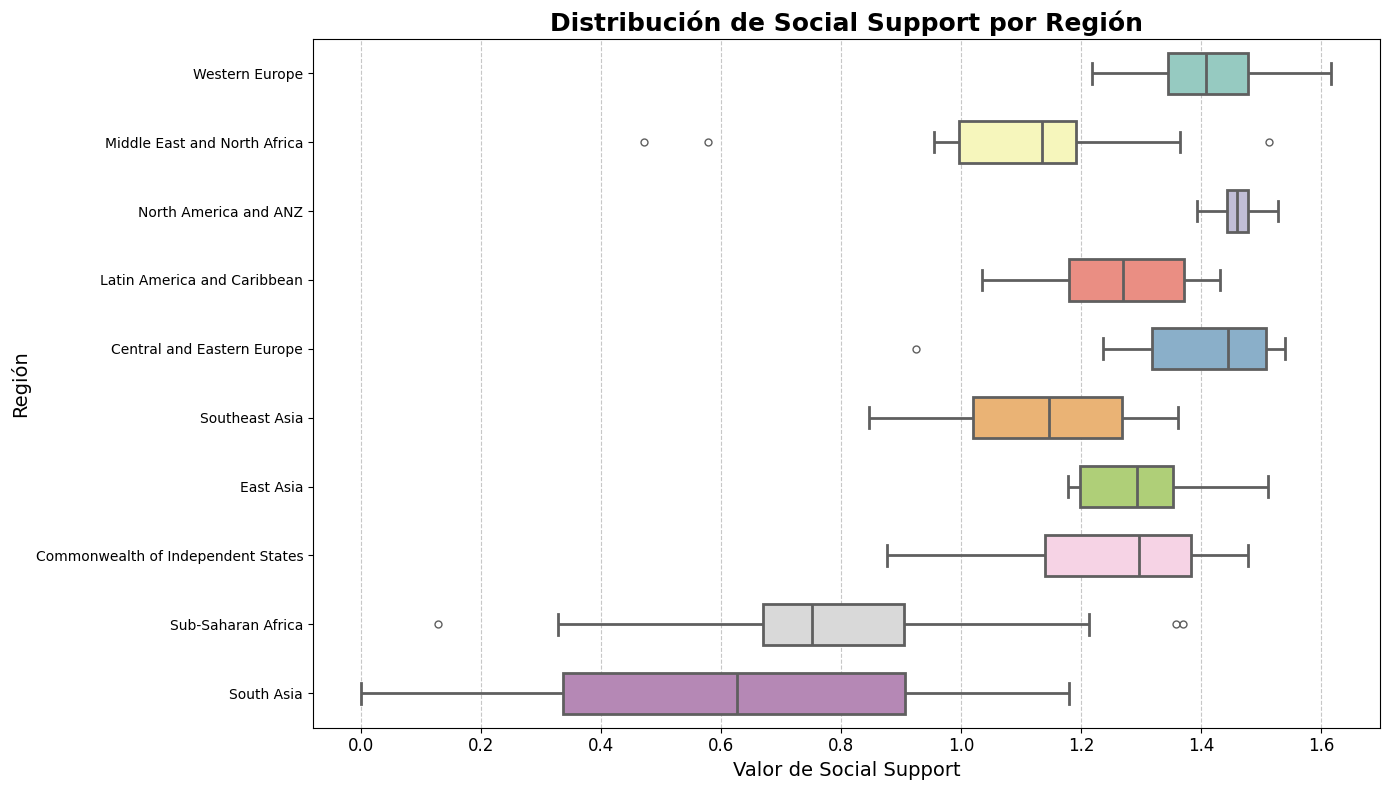

In [25]:
# Ahora realizaremos el boxplot pero agrupado por 'Regional indicator'

plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    data=df_1,
    y='Regional indicator',
    x='Social support',
    palette='Set3',
    linewidth=2,
    fliersize=5,  # tamaño de los outliers
    width=0.6     # ancho de las cajas
)

# Mejorar el estilo
plt.title('Distribución de Social Support por Región', fontsize=18, fontweight='bold')
plt.xlabel('Valor de Social Support', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Agregar líneas verticales suaves

# Bordes más visibles para cada caja
for patch in ax.artists:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

plt.tight_layout()
plt.show()



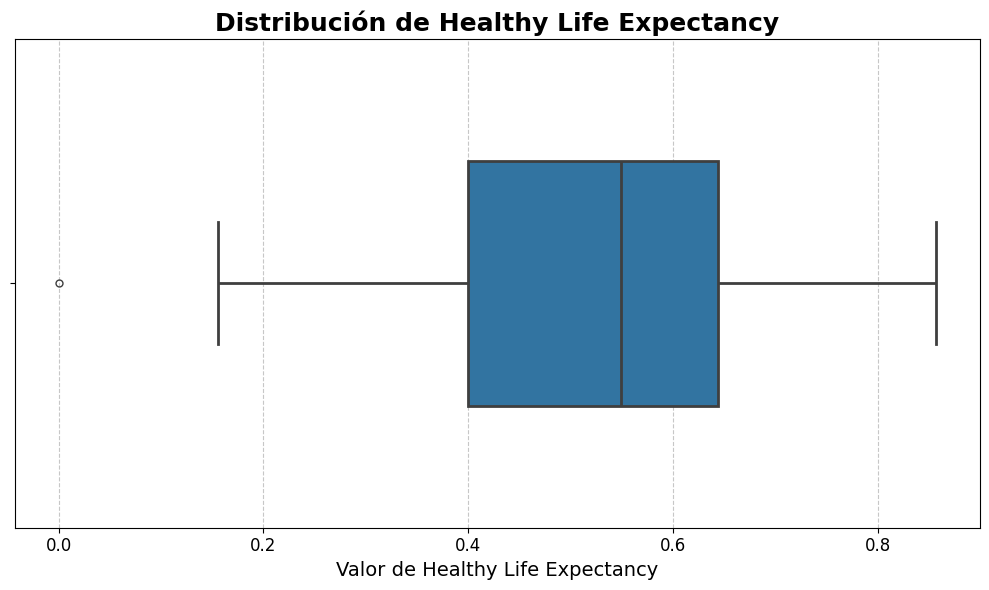

In [32]:
# Corrección completa del código que enviaste

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_1['Healthy life expectancy'],  # corregido
    orient='h',
    linewidth=2,
    fliersize=5,
    width=0.5
)

# Mejorar el estilo del gráfico
plt.title('Distribución de Healthy Life Expectancy', fontsize=18, fontweight='bold')
plt.xlabel('Valor de Healthy Life Expectancy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # líneas de referencia

plt.tight_layout()
plt.show()



<ipython-input-34-7b3971ce765a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


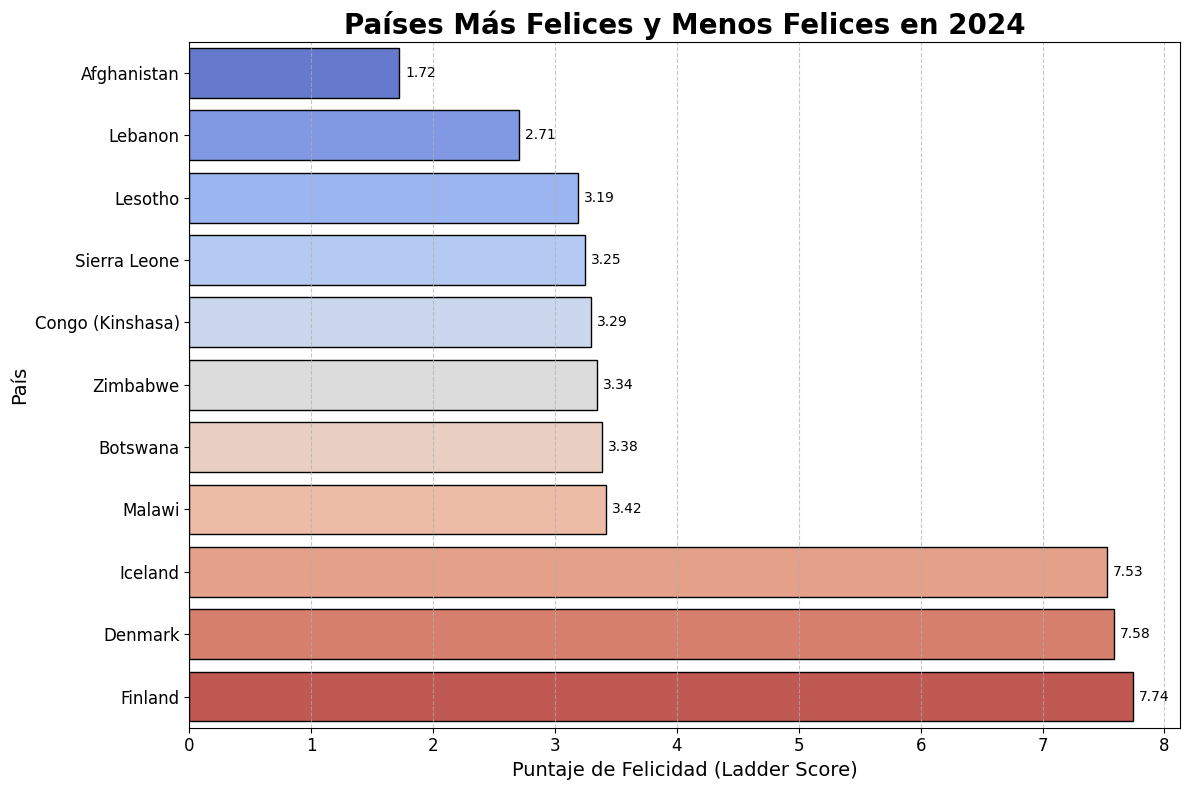

In [34]:
# Crear el subconjunto
df_1_happiest_unhappiest = df_1[(df_1['Ladder score'] > 7.4) | (df_1['Ladder score'] < 3.5)]

# Ordenar los países por Ladder score para una mejor presentación
df_1_happiest_unhappiest = df_1_happiest_unhappiest.sort_values('Ladder score', ascending=True)

# Crear el gráfico mejorado
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Ladder score',
    y='Country name',
    data=df_1_happiest_unhappiest,
    palette='coolwarm',
    edgecolor='black'
)

# Estética general
plt.title('Países Más Felices y Menos Felices en 2024', fontsize=20, fontweight='bold')
plt.xlabel('Puntaje de Felicidad (Ladder Score)', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas de valores al final de cada barra
for index, value in enumerate(df_1_happiest_unhappiest['Ladder score']):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()



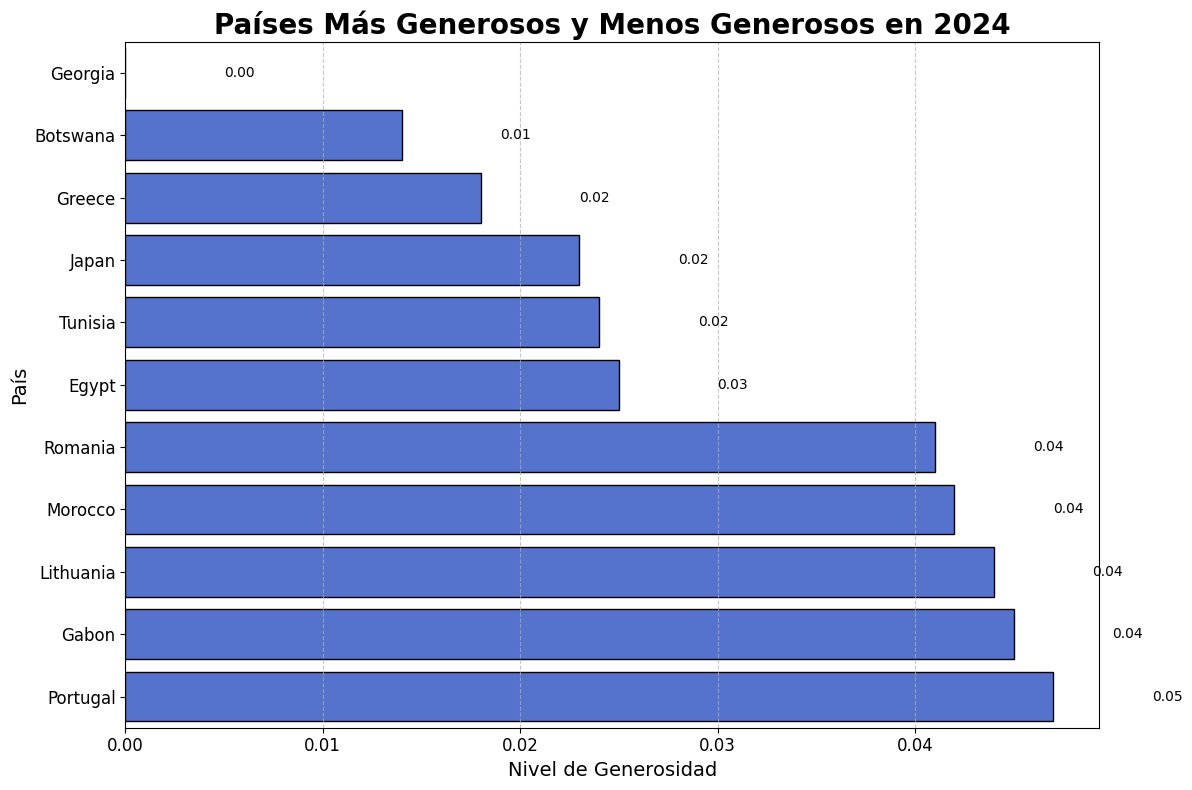

In [40]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Generosity',
    y='Country name',
    data=df_1_generosity,
    color='royalblue',  # Un color sólido agradable
    edgecolor='black'
)

# Mejorar la estética
plt.title('Países Más Generosos y Menos Generosos en 2024', fontsize=20, fontweight='bold')
plt.xlabel('Nivel de Generosidad', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas de valores al final de cada barra
for index, value in enumerate(df_1_generosity['Generosity']):
    plt.text(value + 0.005, index, f'{value:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()



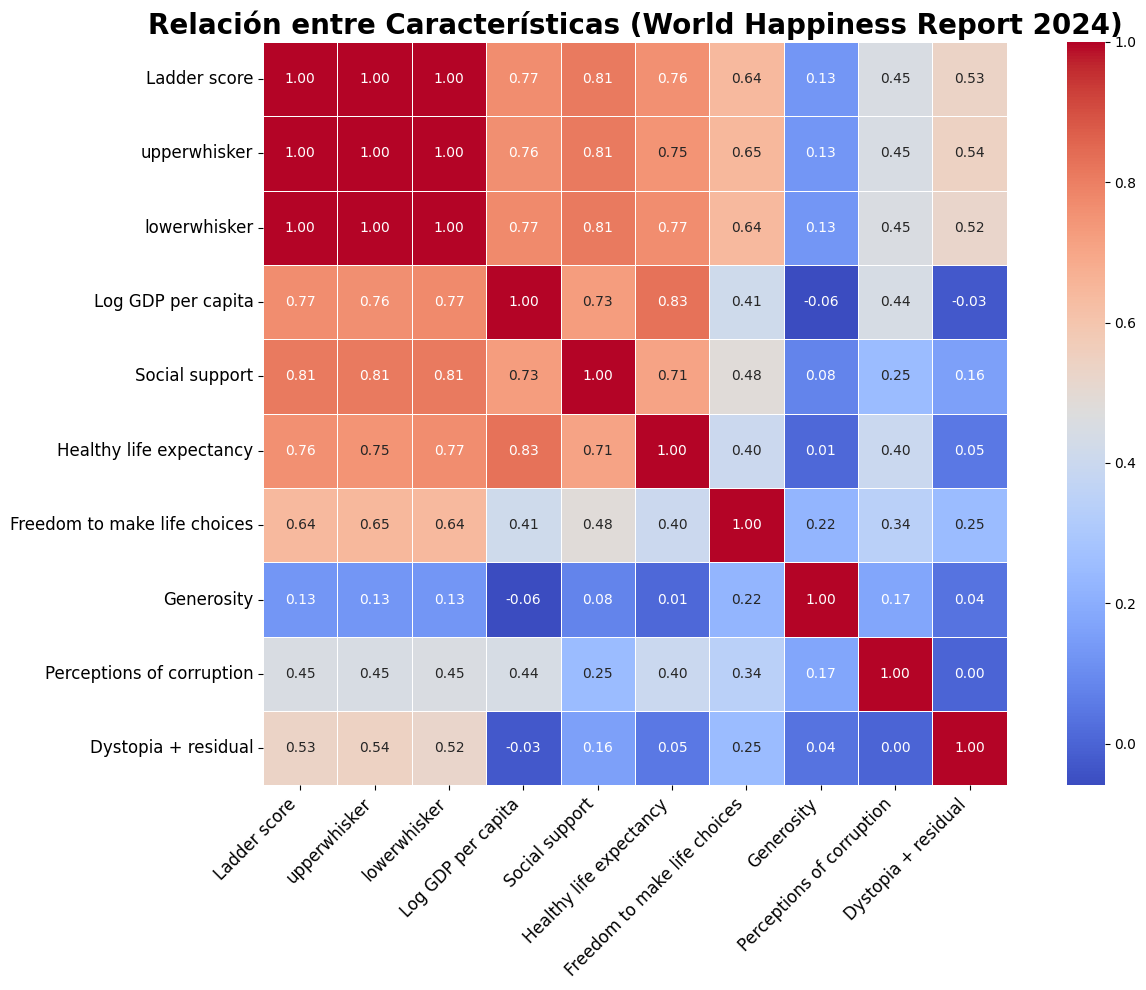

In [37]:
# Corrección completa y mejora del heatmap de correlaciones

# Definir correctamente las columnas no numéricas
non_numeric_columns = df_1.select_dtypes(exclude=['number']).columns

# Crear un dataframe solo con variables numéricas
df_numeric = df_1.drop(columns=non_numeric_columns)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    linewidths=0.7,
    cmap='coolwarm',
    cbar=True,
    square=True,
    annot_kws={"size":10}
)

plt.title('Relación entre Características (World Happiness Report 2024)', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()



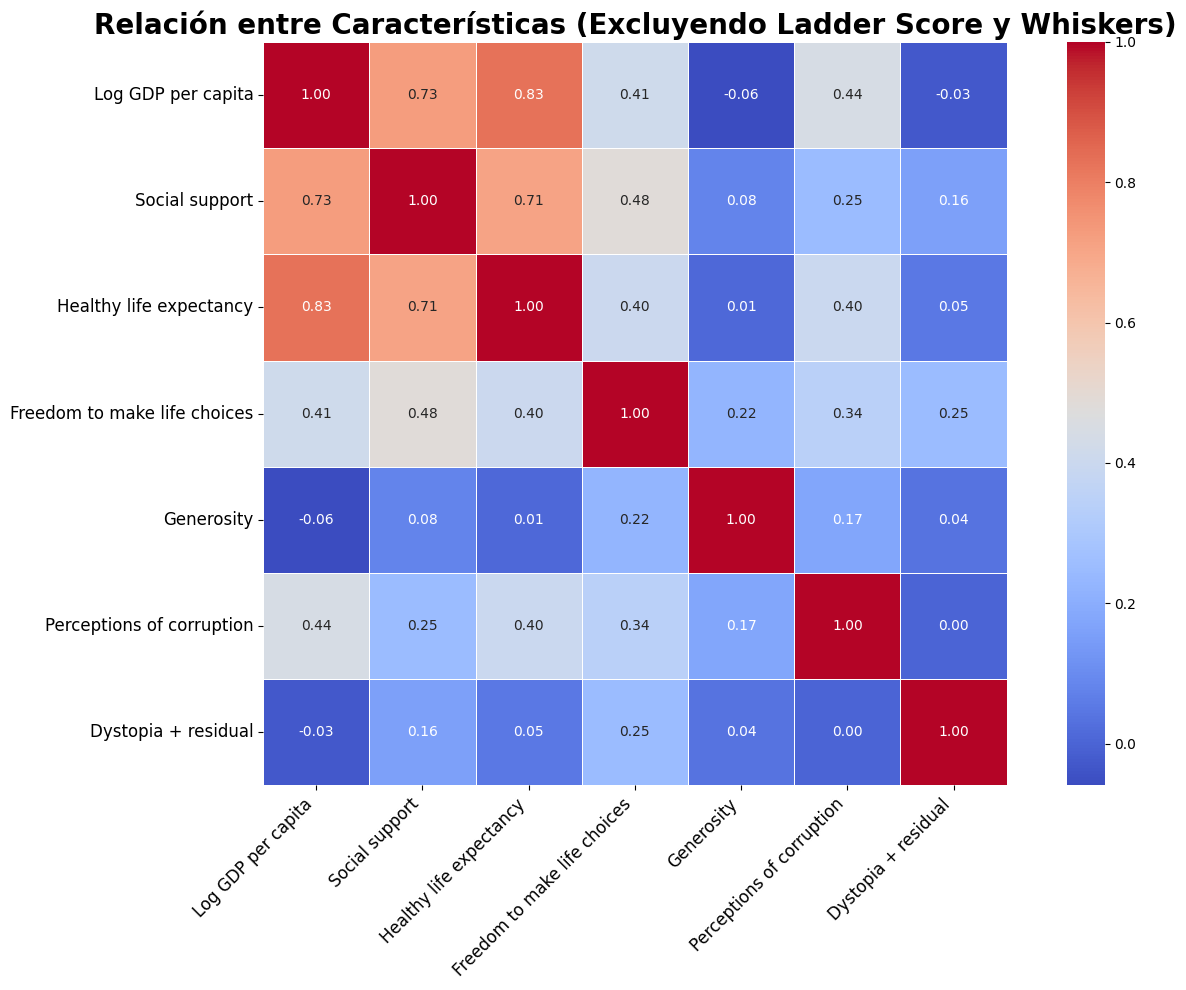

In [38]:
# Definir las columnas no numéricas
non_numeric_columns = df_1.select_dtypes(exclude=['number']).columns

# Lista de columnas adicionales a excluir
additional_exclude = ['Ladder score', 'upperwhisker', 'lowerwhisker']

# Crear un dataframe solo con variables numéricas y sin las columnas adicionales
df_numeric_filtered = df_1.drop(columns=list(non_numeric_columns) + additional_exclude)

# Calcular la nueva matriz de correlación
correlation_matrix_filtered = df_numeric_filtered.corr()

# Crear el nuevo heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix_filtered,
    annot=True,
    fmt='.2f',
    linewidths=0.7,
    cmap='coolwarm',
    cbar=True,
    square=True,
    annot_kws={"size":10}
)

plt.title('Relación entre Características (Excluyendo Ladder Score y Whiskers)', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()



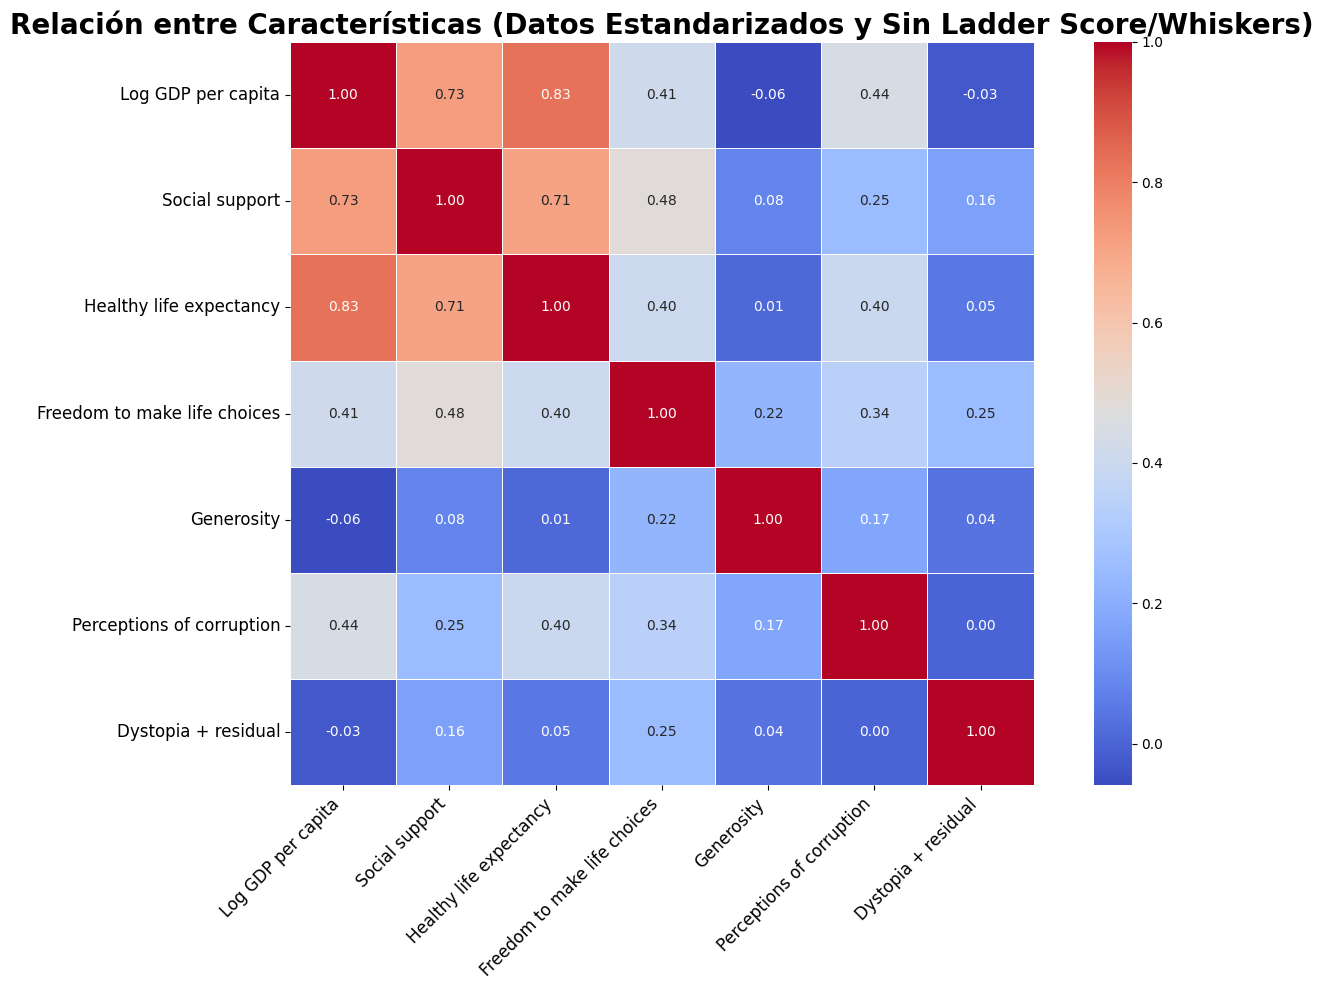

In [39]:
# Vamos a estandarizar los datos y volver a realizar el heatmap

from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric_filtered),
    columns=df_numeric_filtered.columns
)

# Calcular la matriz de correlación de los datos estandarizados
correlation_matrix_scaled = df_numeric_scaled.corr()

# Crear el heatmap de los datos estandarizados
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix_scaled,
    annot=True,
    fmt='.2f',
    linewidths=0.7,
    cmap='coolwarm',
    cbar=True,
    square=True,
    annot_kws={"size":10}
)

plt.title('Relación entre Características (Datos Estandarizados y Sin Ladder Score/Whiskers)', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()



# **PCA**

In [57]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

features = ["Ladder score", "Log GDP per capita", "Social support", "Healthy life expectancy"]
fig = px.scatter_matrix(
    df_1,
    dimensions=features,
    color="Regional indicator"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [58]:
# Assuming df_1 contains the World Happiness Report data
X = df_1[["Ladder score", "Log GDP per capita", "Social support", "Healthy life expectancy"]]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df_1['Regional indicator'],
                      text=df_1['Country name'])  # Add country name for text labels
fig.update_traces(textposition='top center')  # Adjust text position as needed
fig.show() #This line was also incorrectly indented

In [59]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Change df to df_1 to access 'Regional indicator'
fig = px.scatter(components, x=0, y=1, color=df_1['Regional indicator'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

In [60]:
# Add 'Country name' for text labels
fig = px.scatter(components, x=0, y=1, color=df_1['Regional indicator'],
                  text=df_1['Country name']) # add country name as text

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )

fig.update_traces(textposition='top center') # adjust text position as needed
fig.show()

In [61]:
# Add 'Country name' for text labels
fig = px.scatter(components, x=0, y=1, color=df_1['Regional indicator'],
                  text=df_1['Country name']) # add country name as text

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top",
        arrowcolor="red"  # Set arrow color to red
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
        font=dict(color="red")  # Set text color to red
    )

fig.update_traces(textposition='top center') # adjust text position as needed
fig.show()

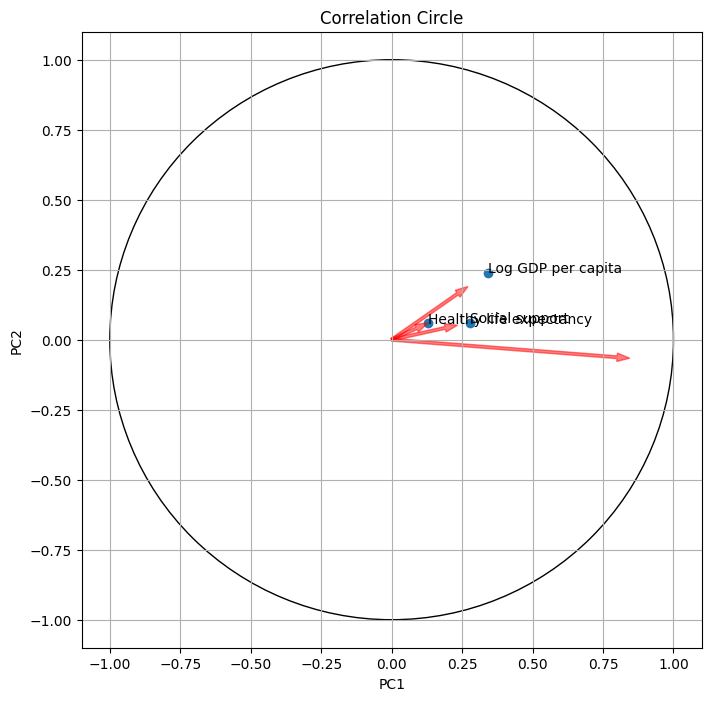

In [68]:
import numpy as np
import matplotlib.pyplot as plt
# Assuming you have loadings and features defined from the previous code

plt.figure(figsize=(8, 8))
plt.scatter(loadings[:, 0], loadings[:, 1])

# Add variable names as labels
for i, feature in enumerate(features):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]))

# Draw unit circle
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='black')
plt.gca().add_artist(circle)

# Add vectors (using raw components and scaling for visibility)
for i in range(loadings.shape[0]):
    # Using raw components and scaling them for visualization
    v = loadings[i, :] / np.max(np.abs(loadings)) * 0.8

    plt.arrow(0, 0, v[0], v[1], color='r', alpha=0.5, width=0.01)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Correlation Circle')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.show()